# Init

In [3]:
import collections


## Dataset-specific -- edit me
data_number = "082"
data_name = "Final"

treatments = collections.OrderedDict()
treatments['control'] = 'control'
treatments['noreward'] = 'benign'
treatments['punish'] = 'harsh'

## basic config
#base_path = "/home/rosiec/Dropbox/School_Docs/Papers/ALife\ CE\ Paper/alife2016/evo_mod/"
#base_path = "/home/rosiec/Dropbox/School_Docs/Papers/Journal\ CE\ Paper/data_analysis/"
base_path = "/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/"
#base_path = "/Core/home/rosiec/__research/mutational_landscapes/"
raw_data_directory = "raw_data"
analysis_directory = "intermediate_data"
scripts_path = "~/Dropbox/School_Docs/Research/research_scripts/"

## generated
data_directory = data_number + "_" + "_".join(data_name.split(" "))
data_path = base_path + raw_data_directory + "/" + data_directory
analysis_path = base_path + analysis_directory

print (data_path)
print (analysis_path)



/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/raw_data/082_Final
/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/intermediate_data


In [4]:
%cd {data_path}
%mkdir {analysis_path}
%cd {analysis_path}
%pwd


/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/raw_data/082_Final
mkdir: cannot create directory ‘/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/intermediate_data’: File exists
/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/intermediate_data


u'/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/intermediate_data'

In [5]:
import glob


import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy  
import scikits.bootstrap as bootstrap
from scipy import stats
import matplotlib.gridspec as gridspec
#from IPython.display import Image
from PIL import Image
from IPython.display import Image as ipyImage

%matplotlib inline
%rehashx
pd.__version__

u'0.20.3'

In [6]:
import sys
sys.path.append({scripts_path})
%run {scripts_path}/quickplot.py --help

Usage: quickplot.py [options] outfile [input_file1 column1 "directory_glob1" name1 .. input_fileN columnN "directory_globN" nameN] 
          


Options:
  -h, --help            show this help message and exit
  -v, --verbose         print extra messages to stdout
  -d, --debug_messages  print debug messages to stdout
  --plotonly            Skip the aggregation step, and plot only, using
                        existing data files.
  --noplot              Skip the plotting step, only aggregate the data files.
  -t TITLE, --title=TITLE
                        set a different title than outfile (default)
  -x XLABEL, --xlabel=XLABEL
                        X-axis Label
  -y YLABEL, --ylabel=YLABEL
                        Y-axis Label
  --include_chevrons    Include line marker glyphs in addition to color
  --chevrons_by_members
                        Make the chevrons track by members, along with line
                        style
  --data_members=MEMBER_COUNT
                        N

# Functional vs Vestigial Sites - Figure 5

/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/raw_data/082_Final/../201_CyclicCE//*control*dominant_active_site_counts.csv
/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/raw_data/082_Final/../201_CyclicCE//*noreward*dominant_active_site_counts.csv
/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/raw_data/082_Final/../201_CyclicCE//*punish*dominant_active_site_counts.csv


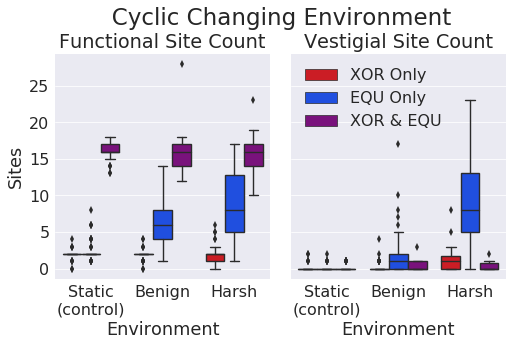

In [17]:
subdir = "../201_CyclicCE/"

dfs = []

tname = {"control": "Static\n(control)",
        "noreward": "Benign",
        "punish": "Harsh"}

for treatment in treatments:
    filepath = data_path + "/" + subdir + "/*" + treatment + "*dominant_active_site_counts.csv"
    filepath = filepath.replace("\\", "")
    print filepath
    filepath = sorted(glob.glob(filepath))[0]    
        
    df = pd.read_csv(filepath, sep=",", header=None, usecols=[0, 1, 2],comment="#",skip_blank_lines=True,
                names=["EQU Only", "XOR Only", "XOR & EQU"])
    
    df = pd.melt(df, value_name="Sites", var_name=["Type"])
    df['Environment'] = [tname[treatment]] * len(df)
    df['Site'] = ["Active"] * len(df)
    dfs.append(df)
    
actives = pd.concat(dfs)

dfs = []
for treatment in treatments:
    filepath = data_path + "/" + subdir + "/*" + treatment + "*dominant_vestigial_site_counts.csv"
    filepath = filepath.replace("\\", "")
    filepath = sorted(glob.glob(filepath))[0]
            
    df = pd.read_csv(filepath, sep=",", header=None, usecols=[0, 1, 2],
                names=["EQU Only", "XOR Only", "XOR & EQU"],
                comment="#",
                skip_blank_lines=True,
                )
    df = pd.melt(df, value_name="Sites", var_name=["Type"])
    df['Environment'] = [tname[treatment]] * len(df)
    df['Site'] = ["Vestigial"] * len(df)
    dfs.append(df)
    
vestigials = pd.concat(dfs)

combined = pd.concat([actives, vestigials])

sns.set(#style="whitegrid", 
        color_codes=True, 
        palette="bright"
)
sns.set_context('paper', font_scale=2)
g = sns.factorplot(x="Environment", y="Sites",
                   hue="Type",
                   col="Site",
                   data=combined, 
                   hue_order=["XOR Only", "EQU Only", "XOR & EQU"],
                   size=5, aspect=.75, #
                   palette={"EQU Only": "b", 
                            "XOR Only": "r",
                            "XOR & EQU": "#89008E"},
                   kind="box", 
                   legend=False)        

plt.subplots_adjust(top=0.85)
g.fig.suptitle("       Cyclic Changing Environment") # can also get the figure from plt.gcf()   

titles = ["Functional Site Count", "Vestigial Site Count"]
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)
    
L=plt.legend(loc="upper left")

!pwd
plt.savefig("CCE_func_vest__box.png", dpi=300)

#plt.subplots_adjust(top=0.85)
#g.fig.suptitle("       Cyclic Changing Environment") # can also get the figure from plt.gcf()   

# Stats

In [8]:
def mww(a, b, nameA, nameB, title, field):
    print
    print title + " - " + nameA + " vs " + nameB
    print "-----------------"
    print stats.ranksums(a[field], b[field]) 
    z_stat, p_val = stats.ranksums(a[field], b[field])  

    if p_val < 0.00001:
        p_text = " $<<$ 0.001"
    elif p_val < 0.001:
        p_text = " < 0.001"
    elif p_val < 0.01:
        p_text = " < 0.01"        
    elif p_val < 0.05:
        p_text = " $<$ 0.05"
    else:
        p_text = " = " + str(round(p_val, 2))
        
    #print (z_stat)
    #print (p_val)

    if p_val < (0.05/3): #bonferroni
        print ("reject null of sameness (different)")
    else:
        print ("can't reject null of sameness")
    print "medians"
    print nameA, a[field].median()
    print nameB, b[field].median()
    
    print "(Wilcoxon Rank Sum Test: Z = " + str(round(z_stat, 2)) + ", p" + p_text + ")"

def kruskal(a, b, c, field=None, verbose=False):
    x = a[field].dropna()
    y = b[field].dropna()
    z = c[field].dropna()    

    if verbose:
        print a[field].describe()
        print b[field].describe()
        print c[field].describe()
        print
        print x
        print y
        print z
    
    print stats.kruskal(x, y, z)
    
def medianCI(data, ci=0.95, p=0.5):    
    '''
    From https://github.com/minddrummer/median-confidence-interval/blob/master/Median_CI.py
    data: pandas datafame/series or numpy array
    ci: confidence level
    p: percentile' percent, for median it is 0.5
    output: a list with two elements, [lowerBound, upperBound]
    '''
    if type(data) is pd.Series or type(data) is pd.DataFrame:
        #transfer data into np.array
        data = data.values

    #flat to one dimension array
    data = data.reshape(-1)
    data = np.sort(data)
    N = data.shape[0]
    
    lowCount, upCount = stats.binom.interval(ci, N, p, loc=0)
    #given this: https://onlinecourses.science.psu.edu/stat414/node/316
    #lowCount and upCount both refers to  W's value, W follows binomial Dis.
    #lowCount need to change to lowCount-1, upCount no need to change in python indexing
    lowCount -= 1
    # print lowCount, upCount
    return data[int(lowCount)], data[int(upCount)]  

def doCI(data):
    
    low, high = medianCI(data)
    
    med = data.median()
    
    print "(Mdn = " +str(round(med, 2))+ ", CI 95\% [" + str(round(low, 2)) + ", " + str(round(high, 2)) + "])"
    print " --- (Mdn = " +str(round(med, 4))+ ", CI 95\% [" + str(round(low, 4)) + ", " + str(round(high, 4)) + "])"
    
def corr(a, b, nameA, nameB, title, fieldA, fieldB):
    print
    print title + " - " + nameA + " vs " + nameB
    print "-----------------"
#     print stats.ranksums(a[field], b[field]) 
#     z_stat, p_val = stats.ranksums(a[field], b[field])  
    
    correlation = ss.pearsonr(a[fieldA], b[fieldB])

    from decimal import Decimal

    #r2 = '%.2E' % Decimal(correlation[0])
    p = '%.2E' % Decimal(correlation[1])
    
    p_val = correlation[1]

    #ann = "$r_{2}$ = " + str(round(correlation[0], 2)) + "\n" + "$p$ = " + p

    if p_val < 0.00001:
        p_text = " $<<$ 0.001"
    elif p_val < 0.001:
        p_text = " < 0.001"
    elif p_val < 0.01:
        p_text = " < 0.01"        
    elif p_val < 0.05:
        p_text = " $<$ 0.05"
    else:
        p_text = " = " + str(round(p_val, 2))
        
    print "(Pearson's R: $r_{2}$ = " + str(round(correlation[0], 2)) + ", p = " + p_text + ")"   
        
    #print (z_stat)
    #print (p_val)

#     if p_val < (0.05/3): #bonferroni
#         print ("reject null of sameness (different)")
#     else:
#         print ("can't reject null of sameness")
    print "medians"
    print nameA, a[fieldA].median()
    print nameB, b[fieldB].median()
    
#    print "(Wilcoxon Rank Sum Test: Z = " + str(round(z_stat, 2)) + ", p" + p_text + ")"

## Vestigials

In [9]:
print vestigials.describe()
print vestigials.head()

            Sites
count  435.000000
mean     1.487356
std      3.455004
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max     23.000000
       Type  Sites        Environment       Site
0  EQU Only      0  Static\n(control)  Vestigial
1  EQU Only      0  Static\n(control)  Vestigial
2  EQU Only      0  Static\n(control)  Vestigial
3  EQU Only      0  Static\n(control)  Vestigial
4  EQU Only      0  Static\n(control)  Vestigial


In [10]:
# Vestigial - Harsh vs Benign - EQU Only
equonly = vestigials.loc[vestigials['Type'] == 'EQU Only']

a = equonly.loc[equonly['Environment'] == 'Static\n(control)']
b = equonly.loc[equonly['Environment'] == 'Benign']
c = equonly.loc[equonly['Environment'] == 'Harsh']

print
print "Static vs Harsh"
print "-----------------"
print stats.ranksums(a['Sites'], c['Sites']) 
z_stat, p_val = stats.ranksums(a['Sites'], c['Sites'])  

#print (z_stat)
#print (p_val)

if p_val < (0.05/3): #bonferroni
    print ("reject null of sameness (different)")
else:
    print ("can't reject null of sameness")
print "medians"
print a['Sites'].median()
print c['Sites'].median()

print
print "Benign vs Harsh"
print "-----------------"
print stats.ranksums(b['Sites'], c['Sites']) 
z_stat, p_val = stats.ranksums(b['Sites'], c['Sites'])  

#print (z_stat)
#print (p_val)

if p_val < (0.05/3): #bonferroni
    print ("reject null of sameness (different)")
else:
    print ("can't reject null of sameness")
print "medians"
print b['Sites'].median()
print c['Sites'].median()


Static vs Harsh
-----------------
RanksumsResult(statistic=-8.3317643965239228, pvalue=7.9646329857218437e-17)
reject null of sameness (different)
medians
0.0
8.0

Benign vs Harsh
-----------------
RanksumsResult(statistic=-6.5712629749925764, pvalue=4.989025587170041e-11)
reject null of sameness (different)
medians
1.0
8.0


In [11]:
print stats.kruskal(a,b,c)

KruskalResult(statistic=7493.8392338445101, pvalue=0.0)


/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


## Function Sites

In [12]:
print actives.describe()
print actives.head()

            Sites
count  435.000000
mean     7.797701
std      6.455127
min      0.000000
25%      2.000000
50%      5.000000
75%     15.000000
max     28.000000
       Type  Sites        Environment    Site
0  EQU Only      4  Static\n(control)  Active
1  EQU Only      4  Static\n(control)  Active
2  EQU Only      1  Static\n(control)  Active
3  EQU Only      2  Static\n(control)  Active
4  EQU Only      2  Static\n(control)  Active


In [13]:
# Functional - Harsh vs Benign - EQU Only
equonly = actives.loc[actives['Type'] == 'EQU Only']

a = equonly.loc[equonly['Environment'] == 'Static\n(control)']
b = equonly.loc[equonly['Environment'] == 'Benign']
c = equonly.loc[equonly['Environment'] == 'Harsh']

print
print "Static vs Harsh"
print "-----------------"
print stats.ranksums(a['Sites'], c['Sites']) 
z_stat, p_val = stats.ranksums(a['Sites'], c['Sites'])  

#print (z_stat)
#print (p_val)

if p_val < (0.05/3): #bonferroni
    print ("reject null of sameness (different)")
else:
    print ("can't reject null of sameness")
print "medians"
print a['Sites'].median()
print c['Sites'].median()

print
print "Benign vs Harsh"
print "-----------------"
print stats.ranksums(b['Sites'], c['Sites']) 
z_stat, p_val = stats.ranksums(b['Sites'], c['Sites'])  

#print (z_stat)
#print (p_val)

if p_val < (0.05/3): #bonferroni
    print ("reject null of sameness (different)")
else:
    print ("can't reject null of sameness")
print "medians"
print b['Sites'].median()
print c['Sites'].median()


Static vs Harsh
-----------------
RanksumsResult(statistic=-6.9600501405653441, pvalue=3.4015165249764199e-12)
reject null of sameness (different)
medians
2.0
8.0

Benign vs Harsh
-----------------
RanksumsResult(statistic=-3.0546105235317054, pvalue=0.0022535296365660622)
reject null of sameness (different)
medians
6.0
8.0


In [14]:
mww(a, b, 'static', 'benign', 'Sites', 'Sites')
mww(a, c, 'static', 'harsh', 'Sites', 'Sites')
mww(b, c, 'benign', 'harsh', 'Sites', 'Sites')



Sites - static vs benign
-----------------
RanksumsResult(statistic=-5.574037104347159, pvalue=2.4890268532445165e-08)
reject null of sameness (different)
medians
static 2.0
benign 6.0
(Wilcoxon Rank Sum Test: Z = -5.57, p $<<$ 0.001)

Sites - static vs harsh
-----------------
RanksumsResult(statistic=-6.9600501405653441, pvalue=3.4015165249764199e-12)
reject null of sameness (different)
medians
static 2.0
harsh 8.0
(Wilcoxon Rank Sum Test: Z = -6.96, p $<<$ 0.001)

Sites - benign vs harsh
-----------------
RanksumsResult(statistic=-3.0546105235317054, pvalue=0.0022535296365660622)
reject null of sameness (different)
medians
benign 6.0
harsh 8.0
(Wilcoxon Rank Sum Test: Z = -3.05, p < 0.01)


In [15]:
print stats.kruskal(a,b,c)

KruskalResult(statistic=7496.1092213477632, pvalue=0.0)
